#Chapter 6 - Data Visualization
Using matplotlib and seaborn

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#the ; allows us to do 2 lines of code together, this just simplifies code
import warnings; warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

In [ ]:
#.iloc is removing the first column of the file. No rows removed
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202022.csv').iloc[:,1:]
df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         650 non-null    object 
 1   Tm             650 non-null    object 
 2   Pos            578 non-null    object 
 3   Age            650 non-null    int64  
 4   G              650 non-null    int64  
 5   GS             650 non-null    int64  
 6   Tgt            650 non-null    int64  
 7   Rec            650 non-null    int64  
 8   PassingYds     650 non-null    int64  
 9   PassingTD      650 non-null    int64  
 10  PassingAtt     650 non-null    int64  
 11  PassingCmp     650 non-null    int64  
 12  RushingYds     650 non-null    int64  
 13  RushingTD      650 non-null    int64  
 14  RushingAtt     650 non-null    int64  
 15  ReceivingYds   650 non-null    int64  
 16  ReceivingTD    650 non-null    int64  
 17  Int            650 non-null    int64  
 18  Fumbles   

##Calculate Usage and FP

In [ ]:
rb_df = df.loc[df['Pos']=='RB']
rb_df['Usage'] = rb_df['Tgt'] + rb_df['RushingAtt']
rb_df['Usage/G'] = rb_df['Usage']/rb_df['G']
rb_df['FantasyPoints/G'] = rb_df['FantasyPoints']/rb_df['G'] #this is PPR FantasyPoints fyi
rb_df.head(10)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage,Usage/G,FantasyPoints/G
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,404,23.764706,19.311765
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,352,20.705882,20.964706
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,390,24.375000,18.925000
5,Austin Ekeler,LAC,RB,27,17,17,127,107,0,0,0,0,915,13,204,722,5,0,5,3,NaN,NaN,372.7,331,19.470588,21.923529
9,Nick Chubb*,CLE,RB,27,17,17,37,27,0,0,0,0,1525,12,302,239,1,0,1,1,1.0,NaN,281.4,339,19.941176,16.552941
14,Saquon Barkley*,NYG,RB,25,16,16,76,57,0,0,0,0,1312,10,295,338,0,0,1,0,1.0,NaN,284.0,371,23.187500,17.750000
17,Jamaal Williams,DET,RB,27,17,9,16,12,0,0,0,0,1066,17,262,73,0,0,3,2,1.0,NaN,225.9,278,16.352941,13.288235
19,Tony Pollard*,DAL,RB,25,16,4,55,39,0,0,0,0,1007,9,193,371,3,0,0,0,NaN,NaN,248.8,248,15.500000,15.550000
20,Dalvin Cook*,MIN,RB,27,17,17,56,39,0,0,0,0,1173,8,264,295,2,0,4,4,NaN,NaN,237.8,320,18.823529,13.988235
21,Miles Sanders*,PHI,RB,25,17,15,26,20,0,0,0,0,1269,11,259,78,0,0,2,2,NaN,NaN,216.7,285,16.764706,12.747059


##Scatter plots

###Seaborn
Create a new figure within pyplot module using figure(). Figures are top level, axes are within figures.


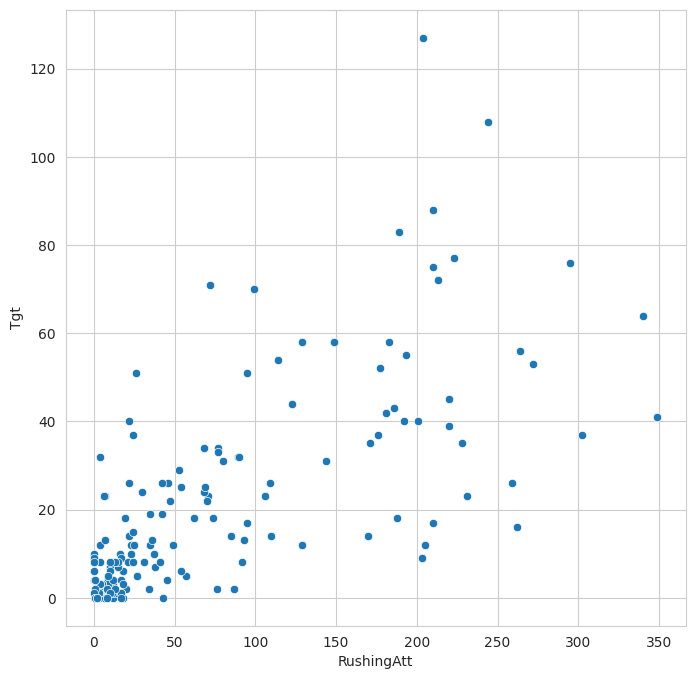

In [ ]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.scatterplot(x=rb_df['RushingAtt'],y=rb_df['Tgt']); #adding ; suppresses text output with viz

Sort of looks like there's a relationship. Usage in running game and usage in passing game are somewhat linked. 

###Matplotlib
Can also do this viz in matplotlib. Matplotlib allows for greater customization, while Seaborn is more efficient

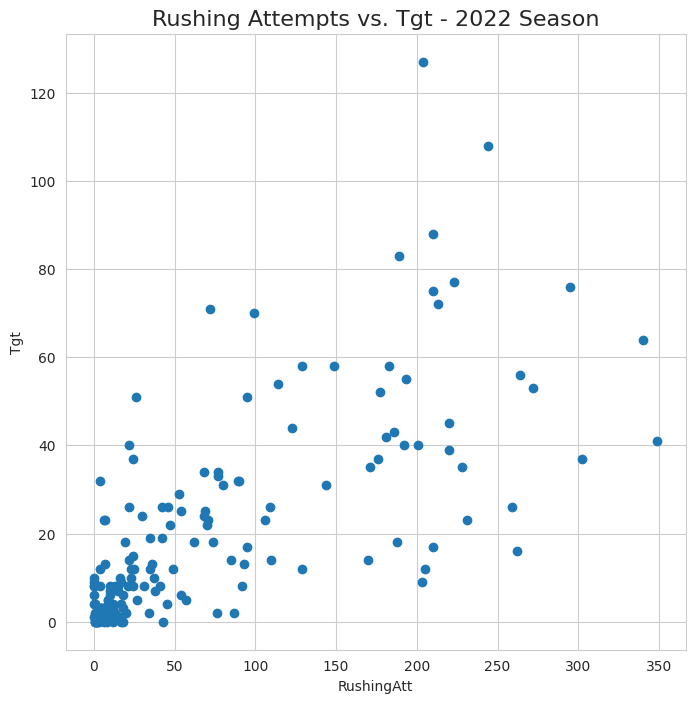

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(rb_df['RushingAtt'],rb_df['Tgt']);
#note there are no axis labels yet
plt.xlabel('RushingAtt')
plt.ylabel('Tgt')
plt.title('Rushing Attempts vs. Tgt - 2022 Season', fontsize = 16);
#points are larger and lacking edge colors

##Regression plots

###Seaborn

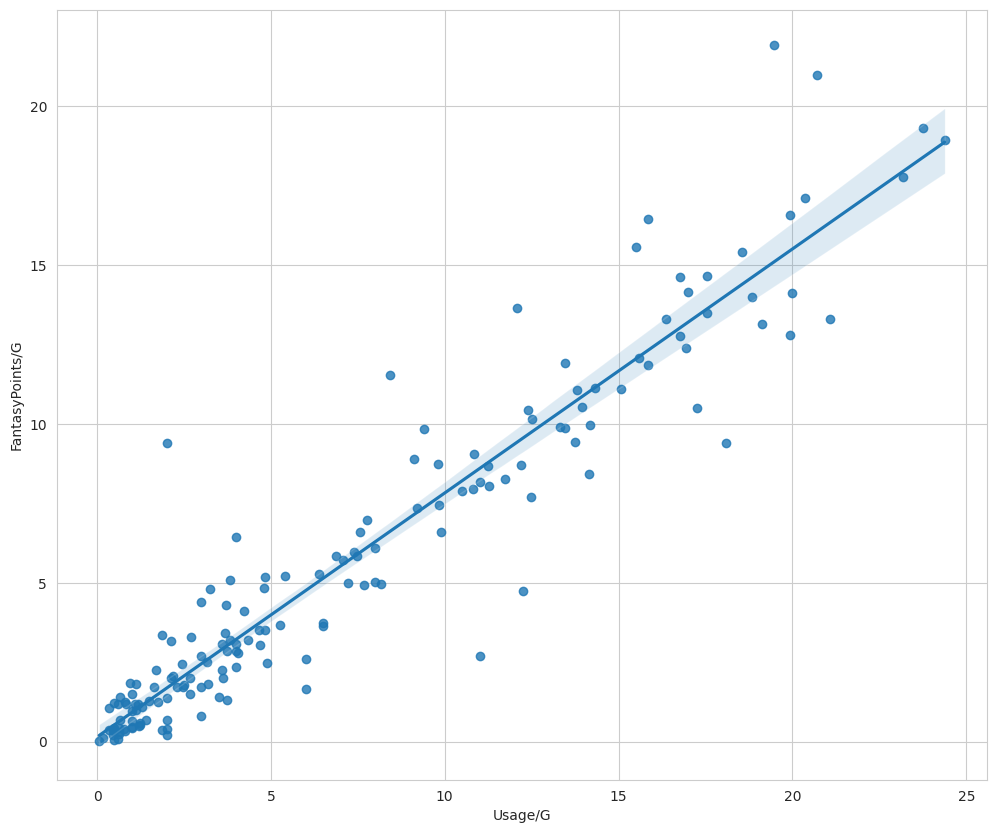

In [ ]:
plt.figure(figsize=(12,10))
sns.regplot(x=rb_df['Usage/G'],y=rb_df['FantasyPoints/G']);
#shadow shows the variance (standard error) - heteroskedasticity
#line is regression line - plots relationship btwn usage/g and fantasy pts/g
#more usage = more points, pretty clear

##Distribution plots

###Kernal density

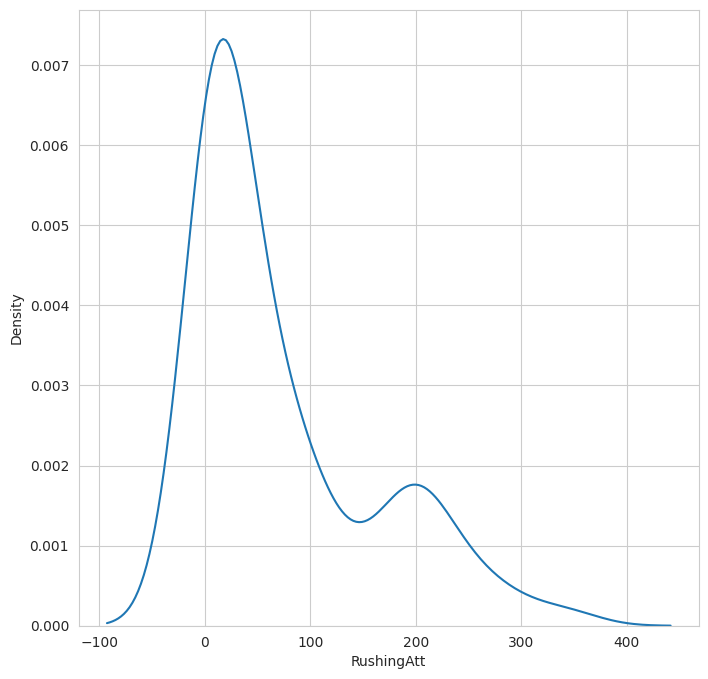

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(rb_df['RushingAtt']);

Think of a KDE plot as a smooth version of a histogram. Instead of dividing the data into discrete bins and counting the number of data points in each bin, a KDE plot uses a smooth curve to represent the density of the data at each point.

To create a KDE plot, the data points are first represented as individual "kernels" (e.g., Gaussian curves), and then these kernels are added up and smoothed out to create a continuous curve that represents the overall shape of the distribution.

KDE plots are useful because they can reveal patterns and features in the data that may not be visible with a simple histogram. They are often used in exploratory data analysis to get a sense of the shape of the data and to identify any outliers or unusual patterns.

Here we see negative rushing attempts - doesn't make sense. So, not a great viz. But most RBs have close to 0 attempts. Spike around 200 attempts might represent the starting/bellcow RBs. Somewhat of a bimodal distribution. 

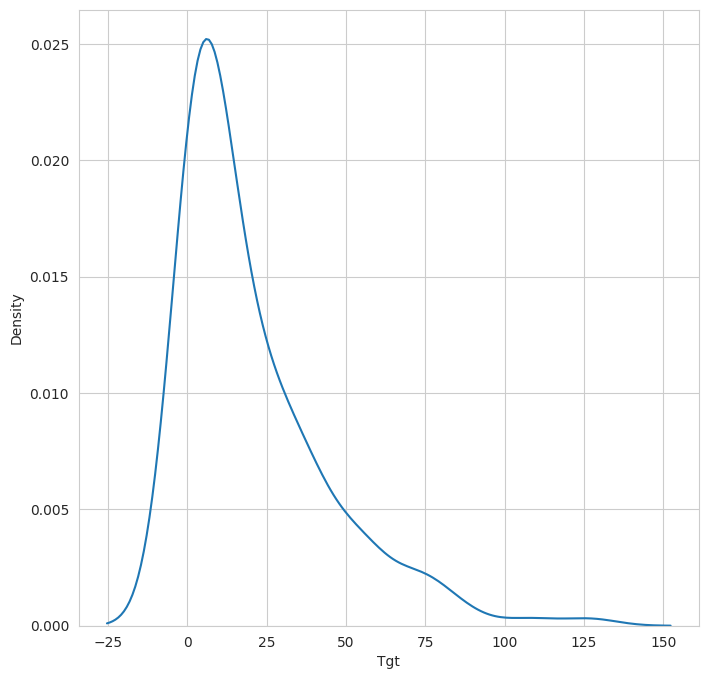

In [ ]:
plt.figure(figsize=(8,8))
sns.kdeplot(rb_df['Tgt']);
#unimodal targets for RBs

###Seaborn displot()
Defaults to hist, but can pass in other types - kde, hist, ecdf

<Figure size 800x800 with 0 Axes>

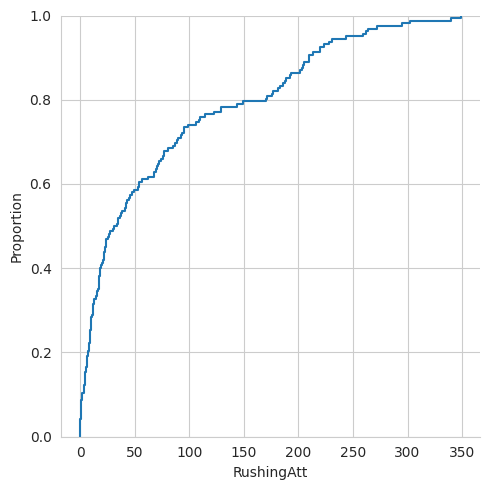

In [ ]:
plt.figure(figsize=(8,8))
# sns.displot(rb_df['RushingAtt'],kind='kde');
# sns.displot(rb_df['RushingAtt'],kind='hist');
sns.displot(rb_df['RushingAtt'],kind='ecdf');

ECDF shows that:
60% of RBs have <=50 Rushing Attempts
80% of RBs have <=150-170 rushing attempts

ECDF is empirical - shows all data points, hence it's jagged. Unlike kde and hist, which have some functions being done to smooth out or bin the data. 

###Histograms

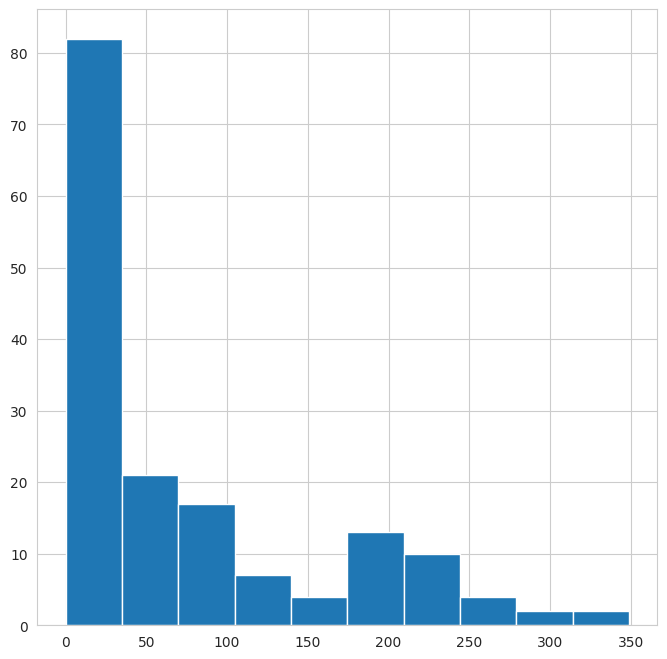

In [ ]:
plt.figure(figsize=(8,8))
# # Seaborn
# sns.displot(rb_df['Tgt'],bins=30);

# Matplotlib
plt.hist(rb_df['RushingAtt']);

##OOP methods for data viz
OOP is more methods heavy, compared to just using pre-existing functions in plt or sns

We are using unpacking notation like loops, where we assign variables to the two results that get returned by subplots().

We create a list of notable players. We filter the rb_df for those with over 50 rushing attempts. 

For loop - again, player_name is made up on the fly. We'll filter the rb_df_filtered df to find rows with 'Player' equal to values in player_name list. Name this filtered view of rb_df_filtered df as 'player'. 

If 'player' is not an empty df, then pull 'Tgt' and 'RushingAtt' values from row, and name them target and rushes. Then annotate the axes so that the player name shows (2 points up and right), and there is a scatter point for each player.

<Axes: xlabel='RushingAtt', ylabel='Tgt'>

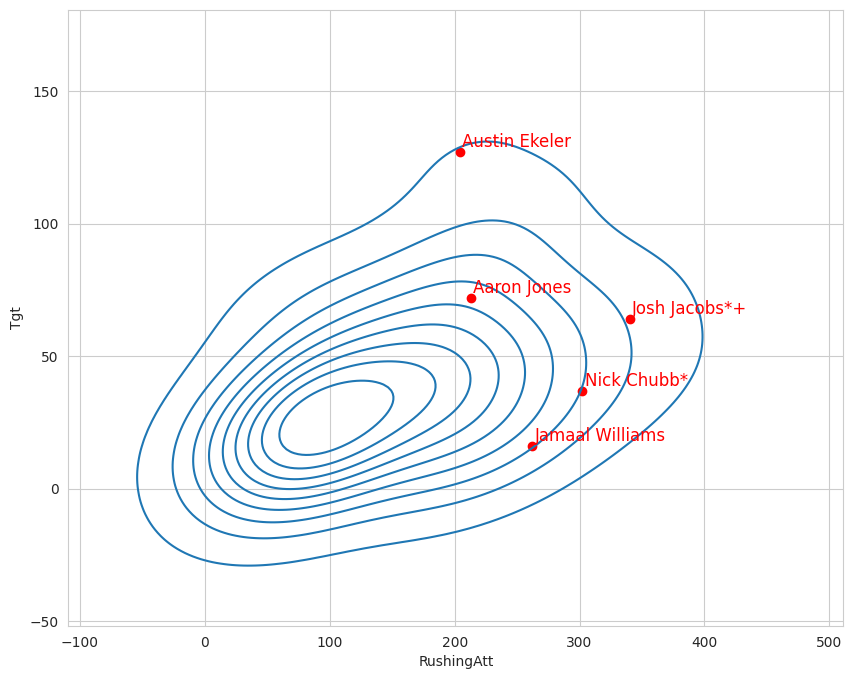

In [ ]:
# fig, ax = plt.subplots(2,2)
fig, ax = plt.subplots(figsize=(10,8)) 

notable_players = [
    'Austin Ekeler', 'Aaron Jones', 'Jamaal Williams', 'Nick Chubb*','Josh Jacobs*+'
]

rb_df_filtered = rb_df.loc[rb_df['RushingAtt']>50]

for player_name in notable_players:
  player = rb_df_filtered.loc[rb_df_filtered['Player'] == player_name]
  if not player.empty:
    targets = player['Tgt']
    rushes = player['RushingAtt']

    ax.annotate(player_name, xy=(rushes+2,targets+2),color='red',fontsize=12)
    ax.scatter(rushes,targets,color='red')
sns.kdeplot(x=rb_df_filtered['RushingAtt'],y=rb_df_filtered['Tgt'], ax=ax, bw_method=0.7)
#bw_method is a smoothing method

This shows a 2D distribution plot - rushing att on x axis and tgt on y axis. Ekeler is at the very high end of the targets distribution, and Jacobs is close to the end of the rushes distribution. 

In [ ]:
# #view all players available in rb_df_filtered 
# pd.set_option('display.max_rows', None)
# rb_df_filtered.head(100)

In [ ]:
# type(player)
# player

pandas.core.frame.DataFrame

###Another 2D distribution

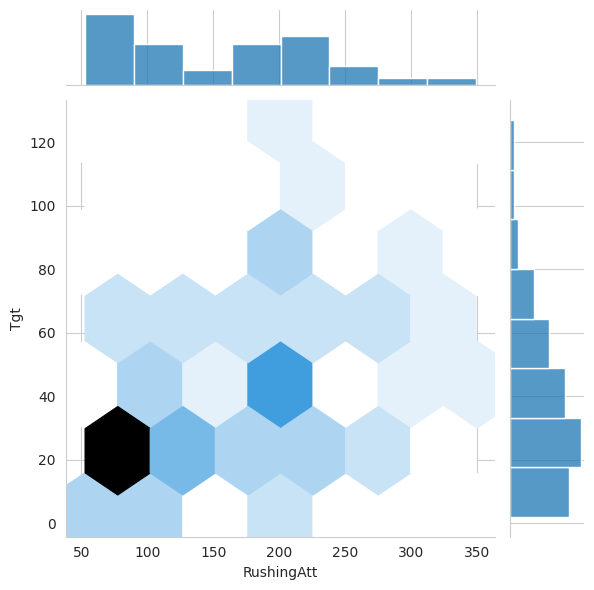

In [ ]:
#can try diff kinds of plots with joinplots
sns.jointplot(x=rb_df_filtered['RushingAtt'],y=rb_df_filtered['Tgt'],kind='hex',dropna=True)
# sns.jointplot(x=rb_df_filtered['RushingAtt'],y=rb_df_filtered['Tgt'],kind='kde',dropna=True)

##Residual plots

Great way to show heteroskedasticity

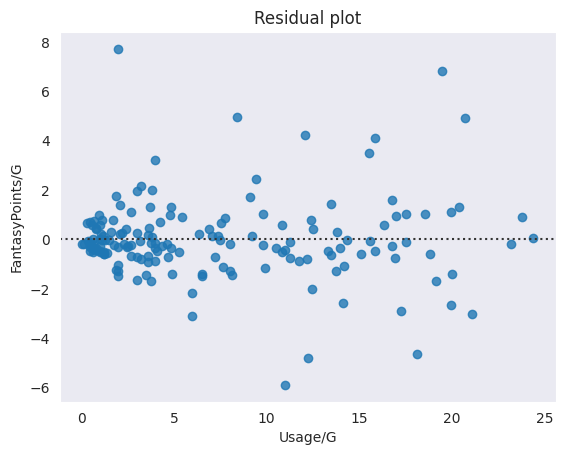

In [ ]:
sns.set_style('dark') # changing up the style

sns.residplot(x=rb_df['Usage/G'], y=rb_df['FantasyPoints/G'])
plt.title('Residual plot')
# plt.xlabel('Usage/GM') # this is how we set an x label in matplotlib
# plt.ylabel('Residual') # this is how we set a y label in matplotlib
plt.show() # show our plot

shows that as independent variable increases, our residuals (the diff between regression and points in scatterplot) increase. So we have players with high usage, and even more FPP than we'd expect - their FPPs don't stick to what we'd predict.

##Pair plots


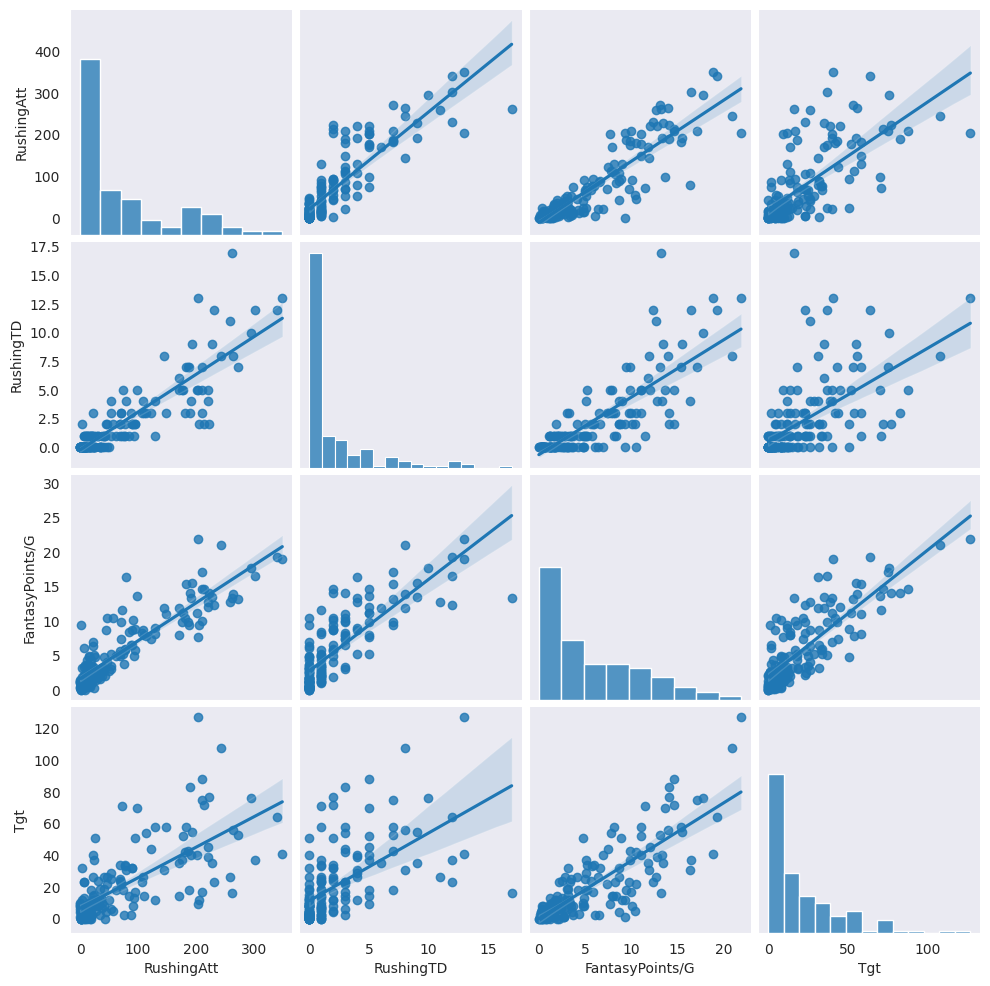

In [ ]:
rb_df_copy = rb_df[['RushingAtt','RushingTD','FantasyPoints/G','Tgt']]

sns.pairplot(rb_df_copy, kind='reg')

##Weekly Data

In [ ]:
weekly_df = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/01-Weekly%20Fantasy%20Stats%20-%202022/weekly_df.csv")
weekly_df

,PlayerID,Player,Position,Tm,Week,PassingYds,PassingAirYards,PassingYAC,PassingTD,Sacks,SackYards,Int,PassingAtt,Cmp,PassingFirstDown,PassingEPA,Passing2PC,RushingAtt,RushingYds,RushingTD,RushingFirstDown,RushingEPA,Rushing2PC,Receptions,Targets,ReceivingYards,ReceivingTDs,ReceivingAirYards,ReceivingYAC,ReceivingFirstDown,ReceivingEPA,Receiving2PC,TargetShare,AirYardsShare,WOPR,SpecialTeamsTD,FumblesLost,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints
0,00-0019596,Tom Brady,QB,TB,1,212,305,87,1,2,17,1,27,18,9,1.050854,0,2,-1,0,0,-1.437167,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,10.38,10.38,10.38
1,00-0019596,Tom Brady,QB,TB,2,190,318,81,1,1,2,0,34,18,8,2.428707,0,3,-2,0,0,-7.115407,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,9.40,9.40,9.40
2,00-0019596,Tom Brady,QB,TB,3,271,236,124,1,3,20,0,42,31,15,1.076749,0,1,-1,0,0,0.000000,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,14.74,14.74,14.74
3,00-0019596,Tom Brady,QB,TB,4,385,326,205,3,1,12,0,52,39,23,9.511334,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,25.40,25.40,25.40
4,00-0019596,Tom Brady,QB,TB,5,351,356,178,1,0,0,0,52,35,17,12.989590,1,3,-3,0,0,-3.336036,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,19.74,19.74,19.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,00-0038134,Kenneth Walker,RB,SEA,17,0,0,0,0,0,0,0,0,0,0,NaN,0,23,133,0,4,-0.424918,0,1,1,9,0,-1,10,1,0.968106,0,0.035714,-0.003717,0.050969,0,0,14.20,15.20,14.70
5625,00-0038134,Kenneth Walker,RB,SEA,18,0,0,0,0,0,0,0,0,0,0,NaN,0,29,114,0,7,-5.109683,0,1,1,10,0,-1,11,0,0.430252,0,0.035714,-0.003745,0.050950,0,0,12.40,13.40,12.90
5626,00-0038134,Kenneth Walker,RB,SEA,19,0,0,0,0,0,0,0,0,0,0,NaN,0,15,63,1,4,1.753022,0,1,1,3,0,0,3,0,-0.309929,0,0.029412,0.000000,0.044118,0,0,12.60,13.60,13.10
5627,00-0038147,Daylen Baldwin,WR,CLE,15,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,NaN,0,2,2,25,0,25,0,2,1.791362,0,0.076923,0.223214,0.271635,0,0,2.50,4.50,3.50


In [ ]:
allen = weekly_df.loc[weekly_df['Player']=='Josh Allen']
mahomes = weekly_df.loc[weekly_df['Player']=='Patrick Mahomes']
wilson = weekly_df.loc[weekly_df['Player']=='Russell Wilson']

###Line plots

Text(0.5, 1.0, 'Wilson vs. Mahomes vs. Allen - week by week Fantasy Performance')

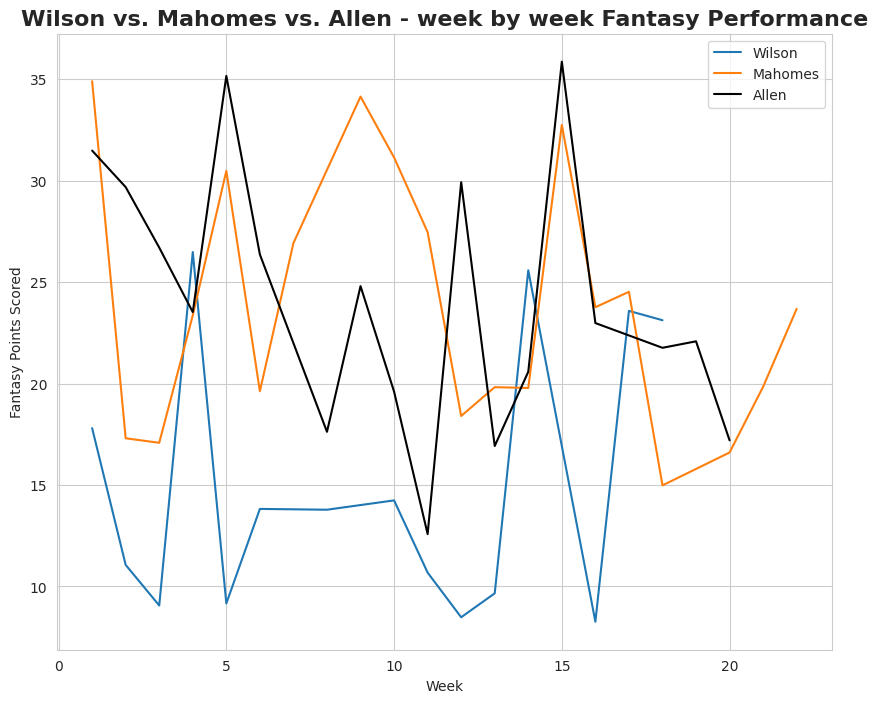

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
plt.plot(wilson['Week'],wilson['StandardFantasyPoints'])
plt.plot(mahomes['Week'],mahomes['StandardFantasyPoints'])
plt.plot(allen['Week'],allen['StandardFantasyPoints'],color='black')

plt.legend(['Wilson','Mahomes','Allen'])
plt.xlabel('Week')
plt.ylabel('Fantasy Points Scored')
plt.title('Wilson vs. Mahomes vs. Allen - week by week Fantasy Performance', fontsize=16,fontweight='bold')

###Heat maps

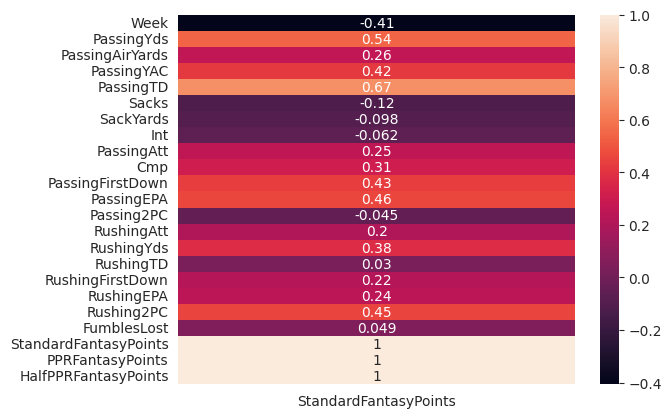

In [ ]:
#.corr provides pairwise correllation between each column in our df, in form of a df
#this is the R^2 value
#NaN means not a number

corr = allen.corr()[['StandardFantasyPoints']].dropna()

sns.heatmap(corr, annot=True);

##LM plot

In [ ]:
#back into season stats, not weekly
df_copy = df.copy()
df_copy ['Usage/G'] = (df_copy['PassingAtt']+ df_copy['Tgt']+ df_copy['RushingAtt'])/df_copy['G']
df_copy ['FantasyPoints/G'] = (df_copy['FantasyPoints'])/df_copy['G']

df_copy.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage/G,FantasyPoints/G
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4,41.764706,24.552941
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,23.764706,19.311765
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,20.764706,20.964706
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,24.500000,18.925000
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7,11.176471,21.688235


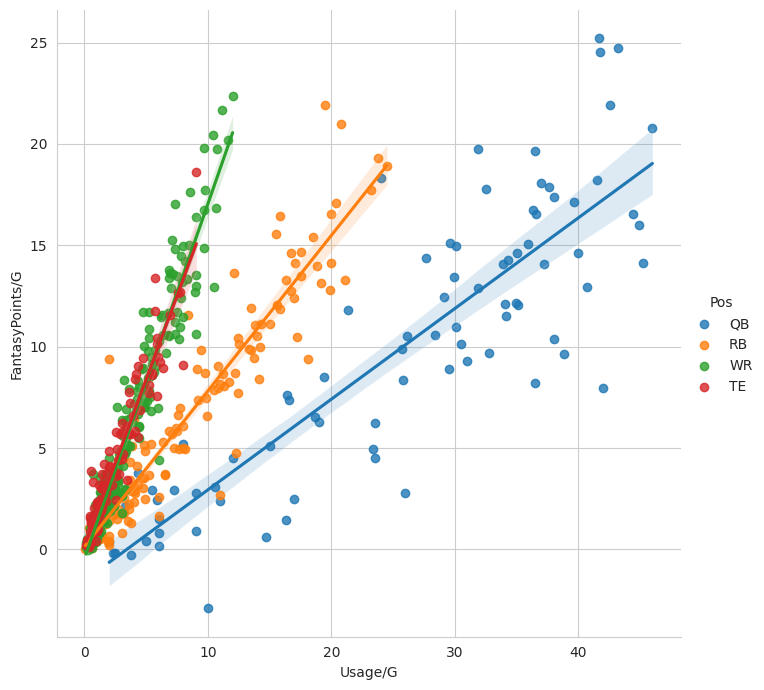

In [ ]:
sns.lmplot(data=df_copy, x='Usage/G',y='FantasyPoints/G',hue='Pos',height=7);

##Combine Data

In [ ]:
combine_df = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/02-Combine%20Data%202000%20to%202023.csv")
combine_df 

,Year,DraftTeam,DraftRound,DraftOverallPick`,PFRPlayerID,CFBPlayerID,Player,Pos,School,Height,Weight,40YD,BenchReps,Vertical,BroadJump,3Cone,Shuttle
0,2000,New York Jets,1.0,13.0,AbraJo00,NaN,John Abraham,OLB,South Carolina,4-Jun,252.0,4.55,NaN,NaN,NaN,NaN,NaN
1,2000,Seattle Seahawks,1.0,19.0,AlexSh00,shaun-alexander-1,Shaun Alexander,RB,Alabama,Jun-00,218.0,4.58,NaN,NaN,NaN,NaN,NaN
2,2000,Kansas City Chiefs,6.0,188.0,AlfoDa20,NaN,Darnell Alford,OT,Boston Col.,4-Jun,334.0,5.56,23.0,25.0,94.0,8.48,4.98
3,2000,NaN,NaN,NaN,NaN,NaN,Kyle Allamon,TE,Texas Tech,2-Jun,253.0,4.97,NaN,29.0,104.0,7.29,4.49
4,2000,Carolina Panthers,1.0,23.0,AndeRa21,NaN,Rashard Anderson,CB,Jackson State,2-Jun,206.0,4.55,NaN,34.0,123.0,7.18,4.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,2022,Green Bay Packers,1.0,28.0,WyatDe00,devonte-wyatt-1,Devonte Wyatt,DT,Georgia,3-Jun,304.0,4.77,NaN,29.0,111.0,NaN,NaN
7676,2022,NaN,NaN,NaN,WydeJa00,jalen-wydermyer-1,Jalen Wydermyer,TE,Texas A&M,4-Jun,255.0,NaN,NaN,NaN,NaN,NaN,NaN
7677,2022,Cleveland Browns,4.0,124.0,YorkCa00,cade-york-1,Cade York,K,LSU,1-Jun,206.0,NaN,12.0,NaN,NaN,NaN,NaN
7678,2022,San Francisco 49ers,6.0,187.0,ZakeNi00,NaN,Nick Zakelj,OT,Fordham,6-Jun,316.0,5.13,27.0,28.5,110.0,7.75,4.71


In [ ]:
# combine_df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [57]:
#group by Pos, pull the 40 YD time column for each grouped position, then get summary stats
combine_df.groupby('Pos')['40YD'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,175.0,5.232971,0.162464,4.83,5.1300,5.230,5.3350,5.84
CB,735.0,4.492830,0.093485,4.23,4.4300,4.490,4.5500,4.94
DB,55.0,4.531636,0.125812,4.31,4.4400,4.510,4.6150,4.85
DE,503.0,4.829066,0.141248,4.36,4.7400,4.830,4.9200,5.24
DL,104.0,4.976346,0.208014,4.52,4.8300,4.980,5.1400,5.46
DT,477.0,5.098700,0.164047,4.68,4.9800,5.080,5.2000,5.71
EDGE,50.0,4.690200,0.153057,4.36,4.5825,4.690,4.7900,5.08
FB,119.0,4.765966,0.138603,4.53,4.6650,4.740,4.8700,5.31
ILB,265.0,4.753774,0.121281,4.42,4.6600,4.750,4.8300,5.18


##Box plots

<Axes: xlabel='Pos', ylabel='40YD'>

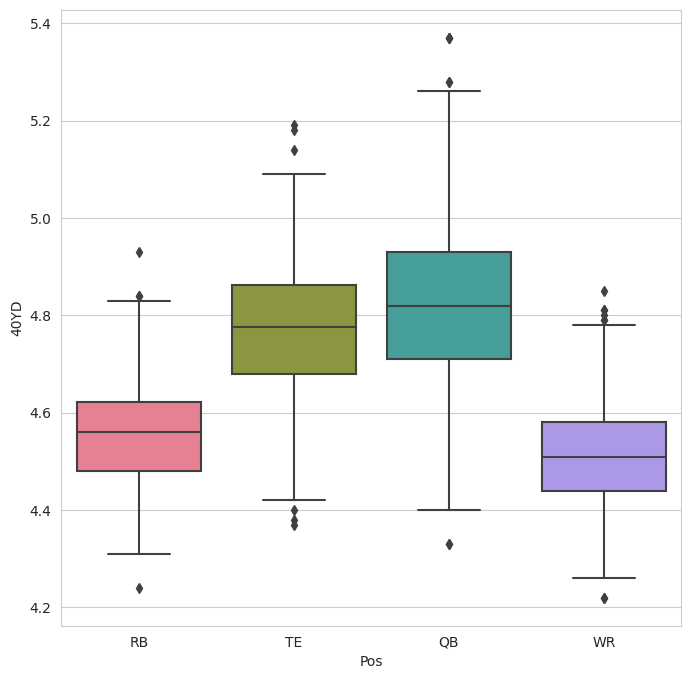

In [62]:
plt.figure(figsize=(8,8))

combine_df_skill_players = combine_df.loc[combine_df['Pos'].isin(['QB','RB','WR','TE'])]
#.isin makes sures that the values listed are in a specific column of a df

# combine_df_skill_players
sns.boxplot(x='Pos', y='40YD', data=combine_df_skill_players, palette = sns.color_palette('husl', n_colors=4))